In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('sms_spam_classification.csv')
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [6]:
import chardet

with open('sms_spam_classification.csv', 'rb') as f:
    result = chardet.detect(f.read(100000))  # Read a chunk of the file
    print(result['encoding'])


Windows-1252


In [7]:
df = pd.read_csv('sms_spam_classification.csv',encoding='Windows-1252',usecols=(['v1','v2']))
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.shape

(5572, 2)

In [9]:
# 1.Data cleaning
# 2.EDA
# 3. Text Preprocessing
# 4.Model Training
# 5.Evaluation
# 6.Improvement
# 7.Website
# 8.Deploy

# 1.Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.rename(columns = {'v1':'target','v2':'text'},inplace=True)
df.sample(3)

,target,text
4747,ham,The beauty of life is in next second.. which h...
4373,ham,K and you're sure I don't have to have consent...
3721,ham,I'm in a movie... Collect car oredi...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df.target=encoder.fit_transform(df.target)

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(403)

In [16]:
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

# 2. EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

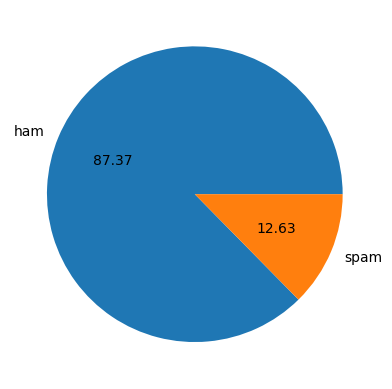

In [21]:
import matplotlib.pyplot as plt
plt.pie(df.target.value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [24]:
# DAta is imbalanced

In [25]:
!pip install nltk

In [25]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:
df['num_characters']=df.text.apply(len)    # num of characters

In [26]:
# num of words
from nltk.tokenize import word_tokenize, sent_tokenize

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x) ) )
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
# ham'
df[df.target==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
# spam'
df[df.target==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
# spam messages are most likely have more words,characters,sentences

In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

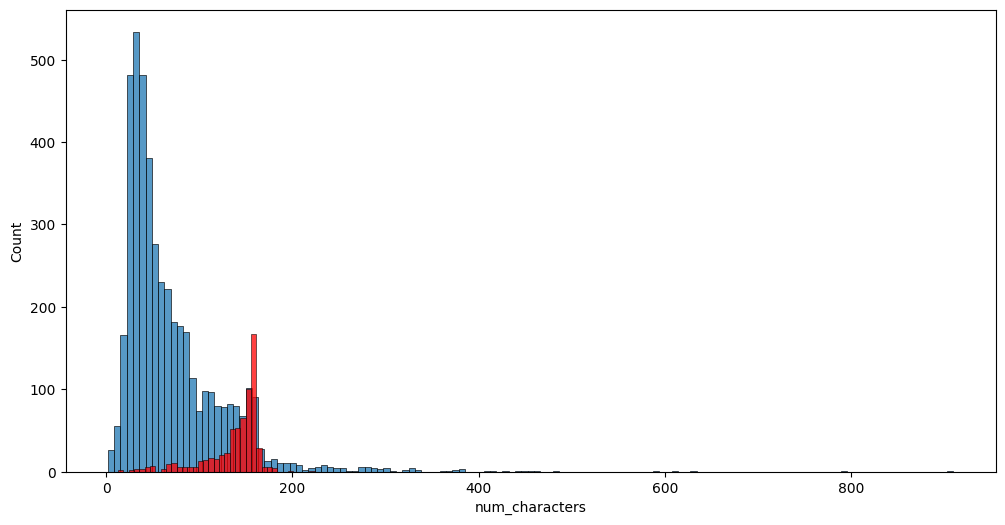

In [39]:
plt.figure(figsize=(12,6))

sns.histplot(df[df.target==0]['num_characters'])
sns.histplot(df[df.target==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

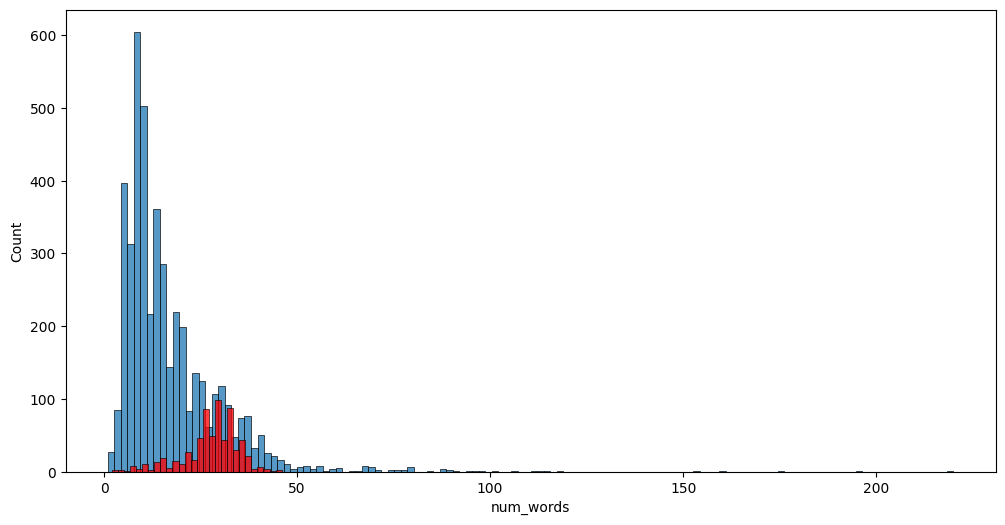

In [40]:
plt.figure(figsize=(12,6))

sns.histplot(df[df.target==0]['num_words'])
sns.histplot(df[df.target==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

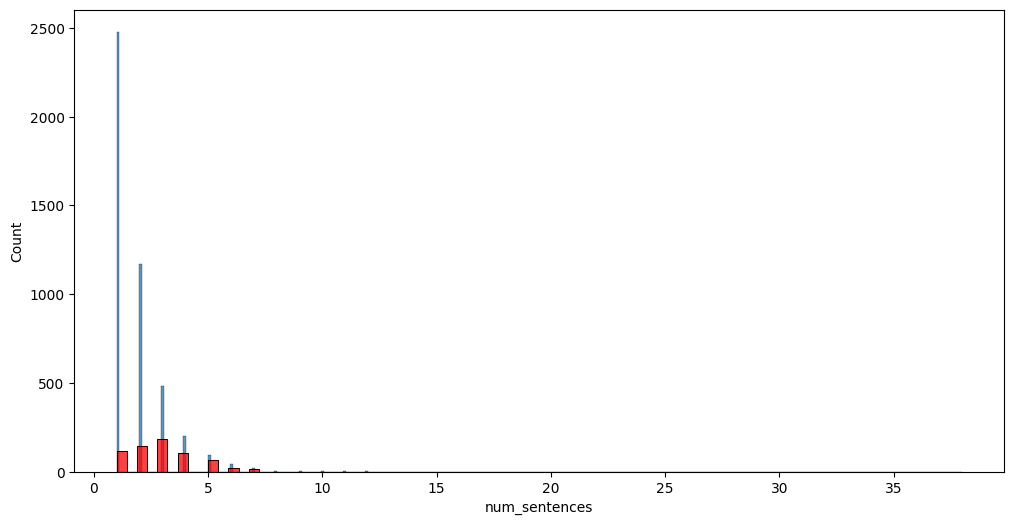

In [41]:
plt.figure(figsize=(12,6))

sns.histplot(df[df.target==0]['num_sentences'])
sns.histplot(df[df.target==1]['num_sentences'],color='red')

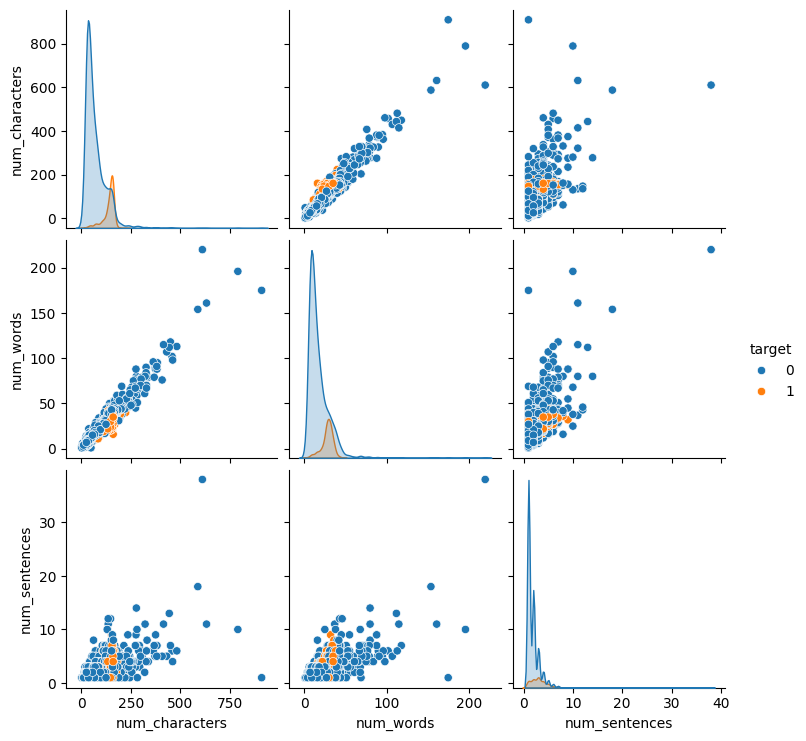

In [43]:
sns.pairplot(df,hue='target')

<Axes: >

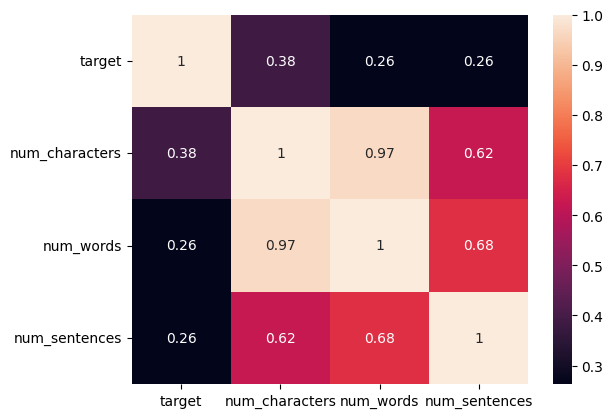

In [46]:
new_df=df.drop(columns=['text'])
sns.heatmap(new_df.corr(),annot=True)

# Data Preprocessing
### Lower case
### Tokenization
### Removing special characters
### Removing stop words and punctuation
### Stemming

In [76]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [80]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [82]:
df['transformed_text']=df.text.apply(transform_text)

In [83]:
df.sample()

,target,text,num_characters,num_words,num_sentences,transformed_text
3431,1,Camera - You are awarded a SiPix Digital Camer...,106,20,3,camera award sipix digit camera call 090612210...


In [88]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [91]:
spam_wc=wc.generate(df[df.target==1]['transformed_text'].str.cat(sep=" "))

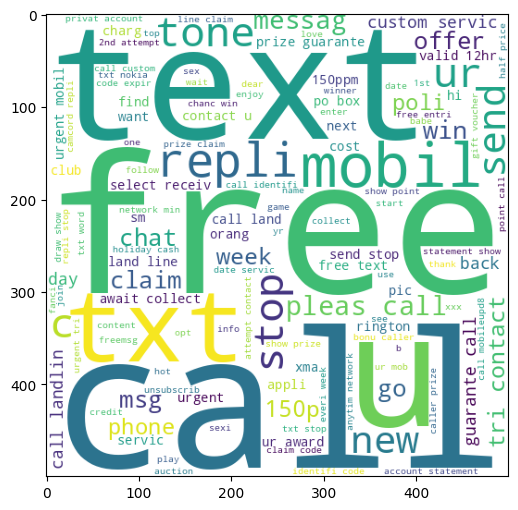

In [93]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

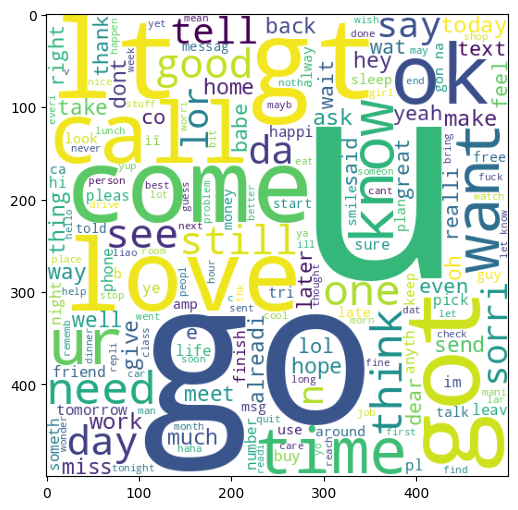

In [94]:
ham_wc=wc.generate(df[df.target==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [95]:
# Top 30 words used in ham & spam msg's

In [100]:
spam_corpus=[]
for msg in df[df.target==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [101]:
len(spam_corpus)

9939

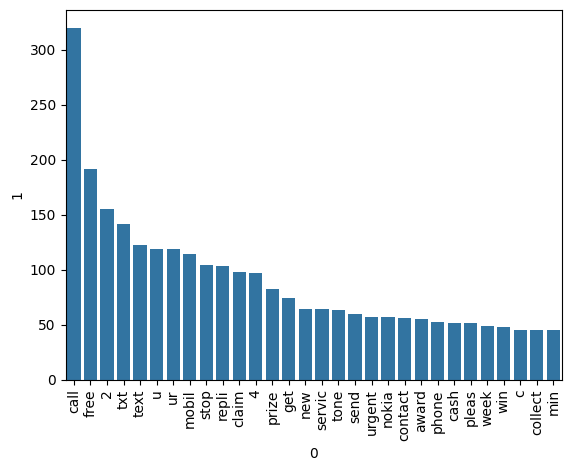

In [107]:
from collections import Counter
dff=pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=dff[0],y=dff[1])
plt.xticks(rotation='vertical')
plt.show()

In [108]:
ham_corpus=[]
for msg in df[df.target==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [109]:
len(ham_corpus)

35404

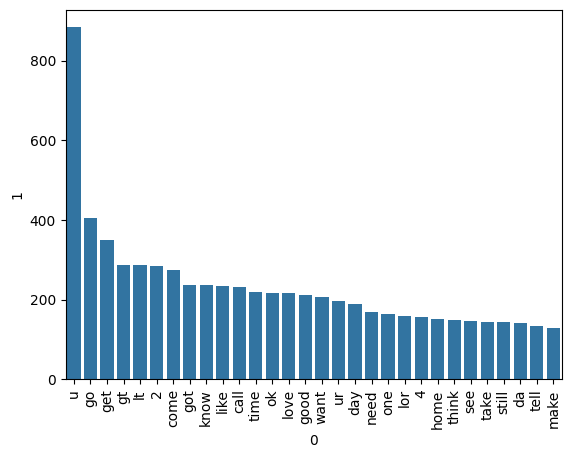

In [110]:
dff2=pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=dff2[0],y=dff2[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [155]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
x=tfidf.fit_transform(df.transformed_text).toarray()
x.shape

(5169, 3000)

In [156]:
y=df.target.values

In [157]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [158]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [159]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [160]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print("accuracy score",accuracy_score(y_test,y_pred1))
print("confusion matrix",confusion_matrix(y_test,y_pred1))
print("precision score",precision_score(y_test,y_pred1))

accuracy score 0.8626692456479691
confusion matrix [[771 118]
 [ 24 121]]
precision score 0.5062761506276151


In [161]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix",confusion_matrix(y_test,y_pred2))
print("precision score",precision_score(y_test,y_pred2))

accuracy score 0.9729206963249516
confusion matrix [[888   1]
 [ 27 118]]
precision score 0.9915966386554622


In [162]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print("accuracy score",accuracy_score(y_test,y_pred3))
print("confusion matrix",confusion_matrix(y_test,y_pred3))
print("precision score",precision_score(y_test,y_pred3))

accuracy score 0.9729206963249516
confusion matrix [[884   5]
 [ 23 122]]
precision score 0.9606299212598425


In [163]:
# tfidf
# mnb

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
                            
#from xgboost import XGBClassifier

In [165]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc= BaggingClassifier(n_estimators=50,random_state=2)
etc= ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50,random_state=2)

In [166]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':knc
}

In [167]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [168]:
train_classifier(mnb,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9915966386554622)

In [169]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9758220502901354
Precision -  0.9477611940298507
For KN
Accuracy -  0.9042553191489362
Precision -  1.0
For NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
For DT
Accuracy -  0.9313346228239845
Precision -  0.8135593220338984
For LR
Accuracy -  0.9468085106382979
Precision -  0.8629032258064516
For RF
Accuracy -  0.971953578336557
Precision -  0.9915254237288136
For AdaBoost
Accuracy -  0.913926499032882
Precision -  0.7916666666666666
For BgC
Accuracy -  0.960348162475822
Precision -  0.8768115942028986
For ETC
Accuracy -  0.9796905222437138
Precision -  1.0
For GBDT
Accuracy -  0.9042553191489362
Precision -  1.0


In [170]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [171]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
8,ETC,0.979691,1.000000
9,GBDT,0.904255,1.000000
2,NB,0.972921,0.991597
5,RF,0.971954,0.991525
0,SVC,0.975822,0.947761
7,BgC,0.960348,0.876812
4,LR,0.946809,0.862903
3,DT,0.931335,0.813559
6,AdaBoost,0.913926,0.791667


In [172]:
performance_df1 = pd.melt(performance_df,id_vars="Algorithm")

In [173]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904255
1,ETC,Accuracy,0.979691
2,GBDT,Accuracy,0.904255
3,NB,Accuracy,0.972921
4,RF,Accuracy,0.971954
5,SVC,Accuracy,0.975822
6,BgC,Accuracy,0.960348
7,LR,Accuracy,0.946809
8,DT,Accuracy,0.931335
9,AdaBoost,Accuracy,0.913926


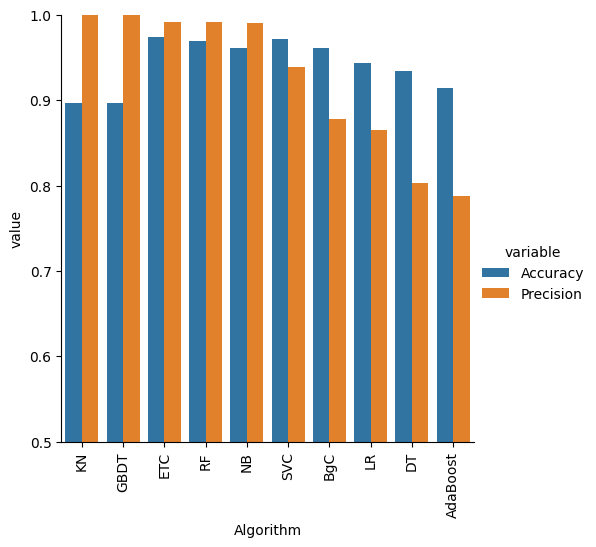

In [154]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Model Improve
# 1. change the max_features parameters of Tfidf

In [174]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy_x,Precision_x,Accuracy_y,Precision_y
0,KN,0.904255,1.000000,0.904255,1.000000
1,ETC,0.979691,1.000000,0.979691,1.000000
2,GBDT,0.904255,1.000000,0.904255,1.000000
3,NB,0.972921,0.991597,0.972921,0.991597
4,RF,0.971954,0.991525,0.971954,0.991525
5,SVC,0.975822,0.947761,0.975822,0.947761
6,BgC,0.960348,0.876812,0.960348,0.876812
7,LR,0.946809,0.862903,0.946809,0.862903
8,DT,0.931335,0.813559,0.931335,0.813559
9,AdaBoost,0.913926,0.791667,0.913926,0.791667


In [175]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))